In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [11]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
breast_cancer["diagnosis"].unique()     #calssi da classificare -> M o B
X = breast_cancer[["radius_se", "concave points_worst"]].values     #definisco le proprietà
Y = breast_cancer["diagnosis"].values                               #definisco il target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#bisogna prima fare l'encoding delle classi poichè le vogliamo nel formato 0 o 1
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
Y_train[:5]

array([0, 0, 0, 1, 0])

In [12]:
#Standardizzo il dataset
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
#Eseguo la regressione logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
Y_pred = lr.predict(X_test)                                     #LOG LOSS = NEGATIVE(LOG LIKELIHOOD)
Y_pred_proba = lr.predict_proba(X_test)                         #guardo la probabilità della predizione
print("ACCURACY= " +str(accuracy_score(Y_test, Y_pred)))        #da 0 (scarso) a 1 (ottimo)
print("LOG LOSS= " +str(log_loss(Y_test, Y_pred_proba)))        #da 0 (ottimo) a 1 (scarso)

ACCURACY= 0.9064327485380117
LOG LOSS= 0.21522054203502763


Creazione della decision boundary

In [17]:
def showBounds(model, X, Y, labels=["Negativo","Positivo"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()

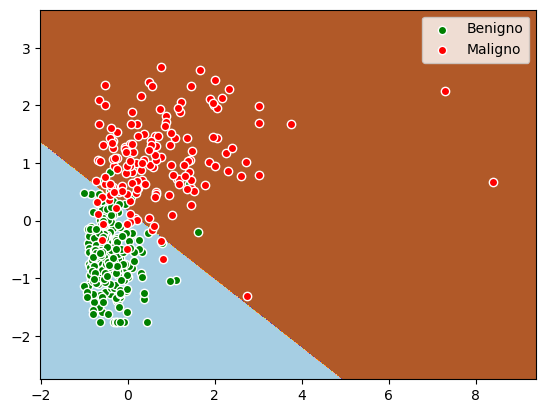

In [18]:
#utilizzo la funzione appena creata per plottare i dati del train
showBounds(lr, X_train, Y_train, labels=["Benigno","Maligno"])                  #buone performance

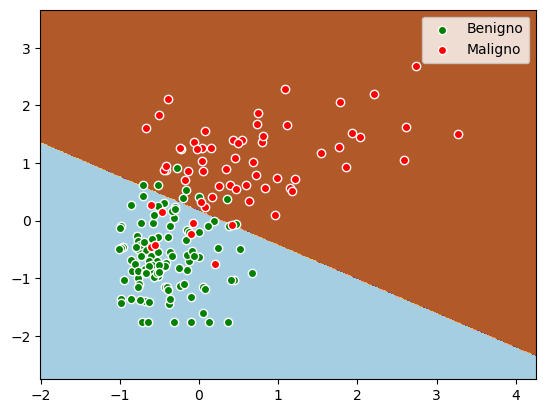

In [19]:
#utilizzo la funzione appena creata per plottare i dati del test
showBounds(lr, X_test, Y_test, labels=["Benigno","Maligno"])                        #buone performance

In [21]:
#considero tutte le proprietà eccetto id
X = breast_cancer.drop(["diagnosis", "id"], axis=1).values
Y = breast_cancer["diagnosis"].values

#rifaccio le stesso cose di prima: encoding, standardizzazione e regressione logistica
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()                       #di default esegue una regolarizzazione l2 con c=1 (=1/lambda)
lr.fit(X_train, Y_train)
#calcolo delle metriche accuracy e log loss
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)
print("ACCURACY= " +str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS= " +str(log_loss(Y_test, Y_pred_proba)))            #valori molto migliori perchè ha più proprietà

ACCURACY= 0.9766081871345029
LOG LOSS= 0.08915736677274287
